# M5 Forecasting

## Project Overview

Overall goal: estimate, as precisely as possible, the point forecasts of the unit sales of various products sold in the USA by Walmart

Specific goal: use hierarchical sales data from Walmart, the world’s largest company by revenue, to forecast daily sales for the next days.

The Makridakis Open Forecasting Center (MOFC) at the University of Nicosia conducts cutting-edge forecasting research and provides business forecast training. It helps companies achieve accurate predictions, estimate the levels of uncertainty, avoiding costly mistakes, and apply best forecasting practices.

## Dataset description

![title](../data/data.png)

The data, covers stores in three US States (California, Texas, and Wisconsin) and includes item level, department, product categories, and store details. In addition, it has explanatory variables such as price, promotions, day of the week, and special events. Together, this robust dataset can be used to improve forecasting accuracy.

The M5 dataset, generously made available by Walmart, involves the unit sales of various products sold in the USA, organized in the form of grouped time series. More specifically, the dataset involves the unit sales of **3,049 products**, classified in **3 product categories** (Household, Foods, and Hobbies) and **7 product departments** (
HOUSEHOLD_1, HOUSEHOLD_2, FOODS_1, FOODS_2, FOODS_3, HOBBIES_1, HOBBIES_2), in which the above-mentioned categories are disaggregated.

The products are sold across ten stores, located in **3 States** (CA, TX, and WI) and **10 shops/stores** (CA_1, CA_2, CA_3, CA_4; TX_1, TX_2, TX_3; WI_1, WI_2, WI_3). 

The historical data range from 2011-01-29 to 2016-06-19. Thus, the products have a (maximum) selling history of 1,941  days / 5.4 years.

## Modeling

### EDA

In [2]:
# import libraries
import pandas as pd

In [3]:
# sales_train_evaluation.csv - Includes sales [d_1 - d_1941] 
# (labels used for the Public leaderboard)
df_evaluation = pd.read_csv('../data/sales_train_evaluation.csv')
df_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [3]:
df_evaluation.shape

(30490, 1947)

In [4]:
for c in df_evaluation.columns:
    if df_evaluation[c].isnull().any():
        print(c)
print('No null columns')

No null columns


In [5]:
df_evaluation['sum'] = df_evaluation[list(df_evaluation.columns)[5:]].sum(axis=1)

### Modelling

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [9]:
# regression models
def reg_model(df, models, names, t):
    r2 = {'Train': [],'Test': []}
    target = t
    predictor = [f for f in df.columns if f!=target]
    X = df[predictor]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for model in models:
        model.fit(X_train, y_train)
        # output R^2
        r2_train = model.score(X_train, y_train)
        r2_test = model.score(X_test, y_test)
        r2['Train'].append(r2_train)
        r2['Test'].append(r2_test)
    print(pd.DataFrame(data=r2, index=names))
    return models

In [8]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [9]:
target = 'd_1941'

In [10]:
#reg_model(df_sales_dummies, [lr, dtr, rfr], names=['LinearRegressor','DecisionTreeRegressor', 'RandomForestRegressor'], t=target)

In [11]:
#reg_model(df_sales_dummies, [lr,dtr], names=['LinearRegression', 'DecisionTreeRegression'], t=target)

In [12]:
# improvement

## 

In [13]:
calendar = pd.read_csv('../data/calendar.csv')
calendar = calendar[calendar['date']<'2016-05-23']

In [14]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [15]:
calendar['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016])

In [16]:
calendar['event_type_1'].unique()

array([nan, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object)

In [17]:
calendar['event_type_2'].unique()

array([nan, 'Cultural', 'Religious'], dtype=object)

In [18]:
weekends = calendar[calendar['wday'].isin([1,2])]['d']
weekdays = calendar[calendar['wday'].isin([3,4,5,6,7])]['d']
weekall = calendar[calendar['wday'].isin([1,2,3,4,5,6,7])]['d']

In [19]:
df_evaluation['weekdays_sum'] = df_evaluation[weekdays].sum(axis=1)
df_evaluation['weekends_sum'] = df_evaluation[weekends].sum(axis=1)
df_evaluation['weekdays_mean'] = df_evaluation[weekdays].mean(axis=1)
df_evaluation['weekends_mean'] = df_evaluation[weekends].mean(axis=1)
df_evaluation['diff_mean'] = df_evaluation['weekends_mean'] / df_evaluation['weekdays_mean']

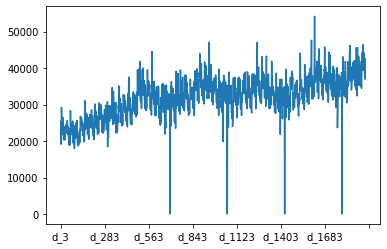

In [20]:
df_evaluation[weekdays].sum(axis=0).plot()

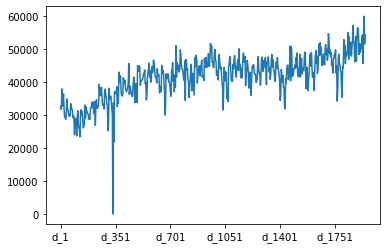

In [21]:
df_evaluation[weekends].sum(axis=0).plot()

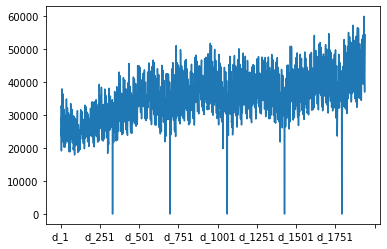

In [22]:
df_evaluation[weekall].sum(axis=0).plot()

In [23]:
df_evaluation[df_evaluation['diff_mean']>1].shape[0], df_evaluation[df_evaluation['diff_mean']<1].shape[0]

(28306, 2184)

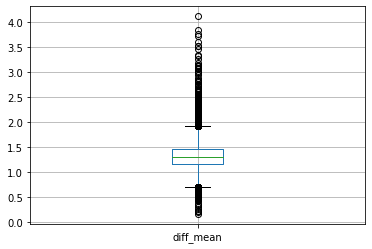

In [24]:
df_evaluation.boxplot('diff_mean')

### First, build model to tell its weekdays or weekend.

In [25]:
df_weekdays = df_evaluation[weekdays]
t = df_weekdays.columns[-1]
weedays_lr, _ = reg_model(df_weekdays, [lr,dtr], ['LinearRegression', 'DecisionTreeRegression'], t)

                           Train      Test
LinearRegression        0.831236  0.656990
DecisionTreeRegression  1.000000  0.400879


In [26]:
df_weekends = df_evaluation[weekends]
t = df_weekends.columns[-1]
weekends_lr, _ = reg_model(df_weekends, [lr,dtr], ['LinearRegression', 'DecisionTreeRegression'], t)

                           Train      Test
LinearRegression        0.805203  0.715170
DecisionTreeRegression  1.000000  0.512646


In [27]:
model_wdwe = [weedays_lr, weekends_lr]

### Second, build model to tell its months.

In [28]:
# about month
Jan = calendar[calendar['month'].isin([1])]['d']
Feb = calendar[calendar['month'].isin([2])]['d']
Mar = calendar[calendar['month'].isin([3])]['d']
Apr = calendar[calendar['month'].isin([4])]['d']
May = calendar[calendar['month'].isin([5])]['d']
Jun = calendar[calendar['month'].isin([6])]['d']
Jul = calendar[calendar['month'].isin([7])]['d']
Aug = calendar[calendar['month'].isin([8])]['d']
Sep = calendar[calendar['month'].isin([9])]['d']
Oct = calendar[calendar['month'].isin([10])]['d']
Nov = calendar[calendar['month'].isin([11])]['d']
Dec = calendar[calendar['month'].isin([12])]['d']

In [29]:
for i in [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]:
    print(df_evaluation[i].sum(axis=1).sum())

5345511
5889589
6387210
6197793
6033079
5250212
5443975
5571730
5321889
5380589
4993624
5111972


In [7]:
sales_months = [5345511, 5889589, 6387210, 6197793, 6033079,5250212,
5443975, 5571730, 5321889, 5380589, 4993624, 5111972]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [2]:
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

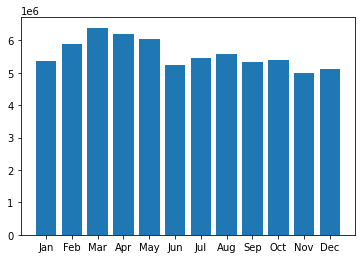

In [8]:
plt.bar(months,sales_months)

In [30]:
# model_month = []
# for i in [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, weekall]:
#     df_ = df_evaluation[i]
#     t = df_.columns[-1]
#     lg, _ = reg_model(df_, [lr,dtr], ['LinearRegression', 'DecisionTreeRegression'], t)
#     model_month.append(lg)

In [31]:
# model_month = model_month[0:12]
# model_month

### Third, build model based on festivals.

In [32]:
# about festival 'Sporting', 'Cultural', 'National', 'Religious'
Sporting = calendar[calendar['event_type_1'].isin(['Sporting']) | calendar['event_type_2'].isin(['Sporting'])]['d']
Cultural = calendar[calendar['event_type_1'].isin(['Cultural']) | calendar['event_type_2'].isin(['Cultural'])]['d']
National = calendar[calendar['event_type_1'].isin(['National']) | calendar['event_type_2'].isin(['National'])]['d']
Religious = calendar[calendar['event_type_1'].isin(['Religious']) | calendar['event_type_2'].isin(['Religious'])]['d']
no_festivals = calendar[calendar['event_type_1'].isnull() | calendar['event_type_2'].isnull()]['d']

In [33]:
for i in [Sporting, Cultural, National, Religious, no_festivals]:
    print(df_evaluation[i].sum(axis=1).sum() / len(i))

35796.0625
34857.575
29458.50980392157
34508.2
34475.23180175529


(20000.0, 35000.0)

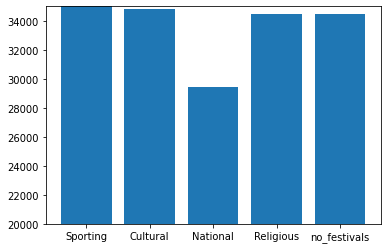

In [11]:
festivals = ['Sporting', 'Cultural', 'National', 'Religious', 'no_festivals']
fes_sales = [35796.0625, 34857.575, 29458.50980392157, 34508.2, 34475.23180175529]
plt.bar(festivals,height=fes_sales)
plt.ylim(20000, 35000)

In [34]:
model_festival = []
for i in [Sporting, Cultural, National, Religious, no_festivals, weekall]:
    df_ = df_evaluation[i]
    t = df_.columns[-1]
    lg, _ = reg_model(df_, [lr,dtr], ['LinearRegression', 'DecisionTreeRegression'], t)
    model_festival.append(lg)

                           Train      Test
LinearRegression        0.542991  0.475400
DecisionTreeRegression  0.970888  0.124788
                           Train      Test
LinearRegression        0.714247  0.675765
DecisionTreeRegression  0.998160  0.329622
                           Train      Test
LinearRegression        0.617666  0.600560
DecisionTreeRegression  0.998454  0.268381
                           Train      Test
LinearRegression        0.697525  0.687618
DecisionTreeRegression  0.998295  0.438360
                           Train      Test
LinearRegression        0.864306  0.677157
DecisionTreeRegression  1.000000  0.488155
                           Train      Test
LinearRegression        0.864416  0.677352
DecisionTreeRegression  1.000000  0.491626


### Forth, build model based on snap.

In [35]:
# 'snap_CA', 'snap_TX', 'snap_WI'
snap_CA = calendar[calendar['snap_CA'].isin([1])]['d']
snap_TX = calendar[calendar['snap_TX'].isin([1])]['d']
snap_WI = calendar[calendar['snap_WI'].isin([1])]['d']
no_snap = calendar[(calendar['snap_CA']==0) & (calendar['snap_TX']==0) & (calendar['snap_WI']==0)]['d']

In [36]:
for i in [snap_CA, snap_TX, snap_WI, no_snap]:
    print(df_evaluation[i].sum(axis=1).sum() / len(i))

36379.090625
36700.409375
36734.1859375
32673.51885830785


(25000.0, 37000.0)

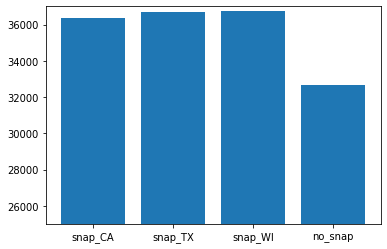

In [15]:
snap_sales = [36379.090625, 36700.409375, 36734.1859375, 32673.51885830785]
snap = ['snap_CA', 'snap_TX', 'snap_WI', 'no_snap']
plt.bar(snap, height=snap_sales)
plt.ylim(25000, 37000)

In [37]:
model_snap = []
for i in [snap_CA, snap_TX, snap_WI, no_snap, weekall]:
    df_ = df_evaluation[i]
    t = df_.columns[-1]
    lg, _ = reg_model(df_, [lr,dtr], ['LinearRegression', 'DecisionTreeRegression'], t)
    model_snap.append(lg)

                           Train      Test
LinearRegression        0.764935  0.637358
DecisionTreeRegression  1.000000  0.366807
                           Train      Test
LinearRegression        0.806127  0.695569
DecisionTreeRegression  1.000000  0.414396
                           Train      Test
LinearRegression        0.813697  0.686464
DecisionTreeRegression  1.000000  0.396368
                           Train      Test
LinearRegression        0.827679  0.702921
DecisionTreeRegression  1.000000  0.501127
                           Train      Test
LinearRegression        0.864416  0.677352
DecisionTreeRegression  1.000000  0.448115


In [38]:
model_snap = model_snap[0:4]
model_snap

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)]

In [39]:
## from the above, we have evidence to believe that snap affects the sales

### Firth, build model based on state and category.

In [40]:
df_evaluation[['id','state_id', 'cat_id']].groupby(['state_id', 'cat_id'], as_index=False).count()

,state_id,cat_id,id
0,CA,FOODS,5748
1,CA,HOBBIES,2260
2,CA,HOUSEHOLD,4188
3,TX,FOODS,4311
4,TX,HOBBIES,1695
5,TX,HOUSEHOLD,3141
6,WI,FOODS,4311
7,WI,HOBBIES,1695
8,WI,HOUSEHOLD,3141


In [41]:
df_evaluation.groupby('cat_id').mean()['sum']

cat_id
FOODS        3195.715170
HOBBIES      1104.540885
HOUSEHOLD    1410.132760
Name: sum, dtype: float64

In [42]:
df_evaluation.groupby('state_id').mean()['sum']

state_id
CA    2393.958429
TX    2102.154258
WI    2022.745272
Name: sum, dtype: float64

In [23]:
df_sales = df_evaluation.loc[:,['dept_id','cat_id','store_id','state_id','d_1932','d_1933',
                                'd_1934','d_1935','d_1936','d_1937','d_1938','d_1939','d_1940','d_1941']]
df_sales_dummies = pd.get_dummies(df_sales)

In [24]:
df_sales_dummies.head()

,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,...,store_id_CA_4,store_id_TX_1,store_id_TX_2,store_id_TX_3,store_id_WI_1,store_id_WI_2,store_id_WI_3,state_id_CA,state_id_TX,state_id_WI
0,2,4,0,0,0,0,3,3,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,1,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,2,0,0,0,2,3,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,4,0,1,3,0,2,6,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,2,1,0,0,2,1,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()

In [28]:
t = 'd_1941'
reg_model(df_sales_dummies, [lr,rdf], ['LinerRegression','DecisionTreeRegressor'], t)

                          Train      Test
LinerRegression        0.732330  0.760234
DecisionTreeRegressor  0.956592  0.760273


[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)]

In [16]:
model_statecat = rdf

### Stacking model

In [53]:
estimators = [
('weekdays', weedays_lr), ('weekends', weekends_lr),
('fest_0', model_festival[0]),('fest_1', model_festival[1]),
('fest_2', model_festival[2]),('fest_3', model_festival[3]),
('fest_4', model_festival[4]),
('snap_0', model_snap[0]),('snap_1', model_snap[1]),
('snap_2', model_snap[2]),('snap_3', model_snap[3]),
('statecat', model_statecat)
]

In [56]:
from sklearn.ensemble import StackingRegressor
reg = StackingRegressor(estimators=estimators,final_estimator=LinearRegression())

In [57]:
df_stacking = pd.get_dummies(df_evaluation)

In [58]:
target = 'd_1941'
predictor = [f for f in df_stacking.columns if f!=target]
X = df_stacking[predictor]
y = df_stacking[target]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

In [31]:
reg.fit(X_train, y_train)

In [32]:
r_square_train = reg.score(X_train, y_train)
r_square_test = reg.score(X_test, y_test)

In [29]:
print('r_square_train is: ', r_square_train)
print('r_square_test is: ', r_square_test)

r_square_train is:  0.858765
r_square_test is:  0.845761
